In [77]:
import pandas as pd
import nltk
import string
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk import pos_tag
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import joblib

In [7]:
df=pd.read_csv('spam.csv',encoding='latin1')

In [9]:
df.shape

(5572, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [14]:
df1=df[['v1','v2']]

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [20]:
df1.head(3)

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [19]:
df1['v1']=df1['v1'].map({'ham':0,'spam':1})

C:\Users\Abdul_Razzaq\AppData\Local\Temp\ipykernel_1004\4275333653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['v1']=df1['v1'].map({'ham':0,'spam':1})


In [22]:
df1.isnull().sum()

v1    0
v2    0
dtype: int64

In [29]:
df2=df1.drop_duplicates()

In [30]:
df2.duplicated().sum()

0

In [31]:
df2

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [43]:
stop=stopwords.words('english')
lem=WordNetLemmatizer()
def check(text):
    text=text.lower()
    text=text.translate(str.maketrans("","",string.punctuation))
    token=TreebankWordTokenizer()
    text=token.tokenize(text)
    stopwords=[]
    for word in text:
        if word not in stop:
            stopwords.append(word)
    lemm=[]
    for word1 in stopwords:
        clear=lem.lemmatize(word1,pos='v')
        lemm.append(clear)              
        
    return ' '.join(lemm)

In [38]:
df2['v2'].apply(check)

0       [go, jurong, point, crazy, available, bugis, n...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, go, usf, live, around, though]
                              ...                        
5567    [2nd, time, try, 2, contact, u, u, å£750, poun...
5568                      [ì, b, go, esplanade, fr, home]
5569                     [pity, mood, soany, suggestions]
5570    [guy, bitch, act, like, id, interest, buy, som...
5571                                   [rofl, true, name]
Name: v2, Length: 5169, dtype: object

In [46]:
df2['message']=df2['v2'].apply(check)

C:\Users\Abdul_Razzaq\AppData\Local\Temp\ipykernel_1004\767056277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['message']=df2['v2'].apply(check)


In [47]:
df2

,v1,v2,message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf live around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,2nd time try 2 contact u u å£750 pound prize 2...
5568,0,Will Ì_ b going to esplanade fr home?,ì b go esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestions
5570,0,The guy did some bitching but I acted like i'd...,guy bitch act like id interest buy something e...


In [79]:
vc=TfidfVectorizer()
x=vc.fit_transform(df2['v2'])

In [80]:
y=df2['v1']

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [82]:
model=MultinomialNB()

In [83]:
model.fit(x_train,y_train)

MultinomialNB()

In [84]:
y_pred=model.predict(x_test)
x_pred=model.predict(x_train)

In [85]:
print(accuracy_score(y_test,y_pred))

0.9555125725338491


In [86]:
cm=confusion_matrix(y_test,y_pred)
cm1=confusion_matrix(y_train,x_pred)

<Axes: >

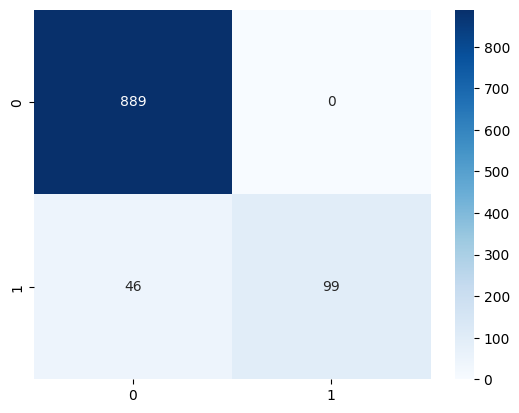

In [87]:
sns.heatmap(cm,annot=True,cmap='Blues',fmt='d')

<Axes: >

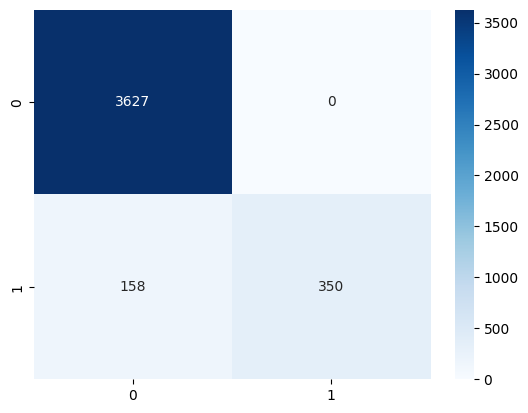

In [88]:
sns.heatmap(cm1,annot=True,cmap='Blues',fmt='d')

In [89]:
print(model.score(x_test,y_test))
print(model.score(x_train,y_train))


0.9555125725338491
0.9617896009673519


In [74]:
new_text = ["Congratulations! You've won a free iPhone. Click to claim."]
ok=vc.transform(new_text)


In [76]:
model.predict(ok)[0]

1

In [78]:
joblib.dump(model,"spam_classifier_model.pkl")
joblib.dump(vc,"vectorizer.pkl")

['vectorizer.pkl']

In [90]:
import streamlit as st